Import the necessary libraries.

In [105]:
from keras.src.models import Sequential
from keras.src.layers import Dense, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the iris dataset and convert the species column to one-hot encoding.

In [106]:
iris = pd.read_csv('../Datasets/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
iris = pd.get_dummies(iris, columns=['species'], dtype=int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


Convert the dataframe to numpy arrays and split the data into input and output. Shuffle the data to avoid any bias.

In [108]:
iris = iris.to_numpy()
np.random.shuffle(iris)

X = iris[:, :4]
y = iris[:, 4:]

print("Input data shape: ", X.shape)
print("Output data shape: ", y.shape)

Input data shape:  (150, 4)
Output data shape:  (150, 3)


Create the model which consists of 3 layers.

In [109]:
model = Sequential([
    Input(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

Compile the model.

In [110]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
history = model.fit(X, y, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1135 - loss: 1.2075 - val_accuracy: 0.0667 - val_loss: 1.2391
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1063 - loss: 1.1936 - val_accuracy: 0.1000 - val_loss: 1.1873
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1384 - loss: 1.1754 - val_accuracy: 0.2667 - val_loss: 1.1491
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2391 - loss: 1.1375 - val_accuracy: 0.3000 - val_loss: 1.1179
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3449 - loss: 1.1043 - val_accuracy: 0.3333 - val_loss: 1.0919
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3671 - loss: 1.0830 - val_accuracy: 0.3667 - val_loss: 1.0692
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4092 - loss: 1.0734 - val_accuracy: 0.4333 - val_loss: 1.0482
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5463 - loss: 1.0455 - val_accuracy: 0.7000 - val_loss

Plot the test and validation accuracies.

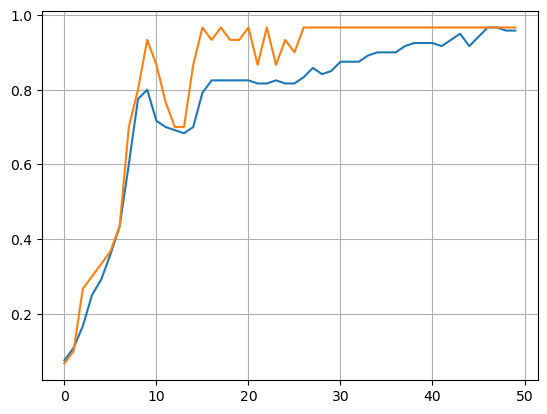

Test accuracy:  0.9583333134651184
Validation accuracy:  0.9666666388511658


In [112]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.show()

print ("Test accuracy: ", history.history["accuracy"][-1])
print ("Validation accuracy: ", history.history["val_accuracy"][-1])